# Tensorboard for XOR NN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import tensorflow as tf
import tensorflow.contrib.eager as tfe
tf.enable_eager_execution() # should be done at the starting of the program

AttributeError: module 'tensorflow.python.pywrap_tensorflow' has no attribute 'TFE_MonitoringNewCounter0'

In [68]:
x_data = [[0,0],[0,1],[1,0],[1,1]]
y_data = [[0],[1],[1],[0]]

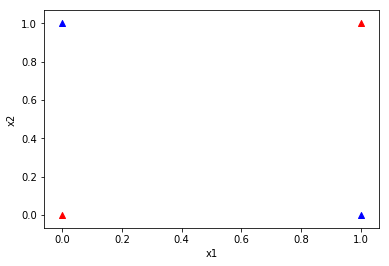

In [69]:
plt.scatter(x_data[0][0],x_data[0][1], c='red' , marker='^')
plt.scatter(x_data[3][0],x_data[3][1], c='red' , marker='^')
plt.scatter(x_data[1][0],x_data[1][1], c='blue' , marker='^')
plt.scatter(x_data[2][0],x_data[2][1], c='blue' , marker='^')

plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

In [70]:
dataset = tf.data.Dataset.from_tensor_slices((x_data, y_data)).batch(len(x_data))

In [71]:
def preprocess_data(features, labels):
    features = tf.cast(features, tf.float32)
    labels = tf.cast(labels, tf.float32)
    return features, labels

In [72]:
W1 = tf.Variable(tf.random_normal([2,1]), name = 'weight1')
b1 = tf.Variable(tf.random_normal([1]), name = 'bias1')
W2 = tf.Variable(tf.random_normal([2,1]), name = 'weight2')
b2 = tf.Variable(tf.random_normal([1]), name = 'bias2')
W3 = tf.Variable(tf.random_normal([2,1]), name = 'weight3')
b3 = tf.Variable(tf.random_normal([1]), name = 'bias3')

In [77]:
def neural_net(features):
    layer1 = tf.sigmoid(tf.matmul(features,W1) + b1)
    layer2 = tf.sigmoid(tf.matmul(features,W2) + b2)
    layer3 = tf.concat([layer1, layer2], -1)
    layer3 = tf.reshape(layer3, shape = [-1,2])
    hypothesis = tf.sigmoid(tf.matmul(layer3, W3) + b3)
    
    with tf.contrib.summary.record_summaries_every_n_global_steps(1):
        tf.contrib.summary.histogram('weights1', W1)
        tf.contrib.summary.histogram('weights2', W2)
        tf.contrib.summary.histogram('weights3', W3)
        tf.contrib.summary.histogram('bias1', b1)
        tf.contrib.summary.histogram('bias2', b2)
        tf.contrib.summary.histogram('bias3', b3)
        tf.contrib.summary.histogram('layer1', layer1)
        tf.contrib.summary.histogram('layer2', layer2)
        tf.contrib.summary.histogram('layer3', layer3)
    return hypothesis

def loss_fn(hypothesis, labels):
    cost = -tf.reduce_mean(labels * tf.log(hypothesis) + (1-labels)*tf.log(1-hypothesis))
    with tf.contrib.summary.record_summaries_every_n_global_steps(1):
        tf.contrib.summary.scalar('loss', cost)
    return cost

optimizer = tf.train.GradientDescentOptimizer(learning_rate = 0.01)

def accuracy_fn(hypothesis, labels):
    predicted = tf.cast(hypothesis > 0.5, dtype = tf.float32)
    accuracy = tf.reduce_mean(tf.cast(tf.equal(predicted, labels), dtype = tf.float32))
    return accuracy

def grad(hypothesis, features, labels):
    with tf.GradientTape() as tape:
        loss_value = loss_fn(neural_net(features), labels)
    return tape.gradient(loss_value, [W1,W2,W3,b1,b2,b3])

In [81]:
EPOCHS = 3000

log_path = "./logs/xor_eager_logs_r0_03"
writer = tf.contrib.summary.create_file_writer(log_path)
global_step = tf.train.get_or_create_global_step()
writer.set_as_default()

for step in range(EPOCHS):
    global_step.assign_add(1)
    for features, labels in tfe.Iterator(dataset):
        features, labels = preprocess_data(features, labels)
        grads = grad(neural_net(features), features, labels)
        optimizer.apply_gradients(grads_and_vars=zip(grads,[W1,W2,W3,b1,b2,b3]))
        if step % 50 == 0:
            print("Iter: {}, Lost: {:.4f}".format(step, loss_fn(neural_net(features), labels)))
x_data, y_data = preprocess_data(x_data, y_data)
test_acc = accuracy_fn(neural_net(x_data), y_data)
print("Testset Accuracy: {:.4f}".format(test_acc))

Iter: 0, Lost: 0.6926
Iter: 50, Lost: 0.6926
Iter: 100, Lost: 0.6926
Iter: 150, Lost: 0.6926
Iter: 200, Lost: 0.6926
Iter: 250, Lost: 0.6926
Iter: 300, Lost: 0.6926
Iter: 350, Lost: 0.6926
Iter: 400, Lost: 0.6926
Iter: 450, Lost: 0.6926
Iter: 500, Lost: 0.6926
Iter: 550, Lost: 0.6926
Iter: 600, Lost: 0.6926
Iter: 650, Lost: 0.6926
Iter: 700, Lost: 0.6925
Iter: 750, Lost: 0.6925
Iter: 800, Lost: 0.6925
Iter: 850, Lost: 0.6925
Iter: 900, Lost: 0.6925
Iter: 950, Lost: 0.6925
Iter: 1000, Lost: 0.6925
Iter: 1050, Lost: 0.6925
Iter: 1100, Lost: 0.6925
Iter: 1150, Lost: 0.6925
Iter: 1200, Lost: 0.6925
Iter: 1250, Lost: 0.6925
Iter: 1300, Lost: 0.6925
Iter: 1350, Lost: 0.6925
Iter: 1400, Lost: 0.6925
Iter: 1450, Lost: 0.6925
Iter: 1500, Lost: 0.6925
Iter: 1550, Lost: 0.6925
Iter: 1600, Lost: 0.6925
Iter: 1650, Lost: 0.6925
Iter: 1700, Lost: 0.6925
Iter: 1750, Lost: 0.6924
Iter: 1800, Lost: 0.6924
Iter: 1850, Lost: 0.6924
Iter: 1900, Lost: 0.6924
Iter: 1950, Lost: 0.6924
Iter: 2000, Lost: 0.692